In [1]:

from numpy import nan
import pandas as pd 
import networkx as nx
from methods import *
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import ast
#Importamos o arquivo de contactos 
contactos=pd.read_csv(r'/home/juan/Python/Acculturation/Contactos.csv',low_memory=False)
df=pd.read_csv(r'/home/juan/Python/Acculturation/all_data_clean.csv',low_memory=False)

del contactos['Unnamed: 0']
del df['Unnamed: 0']

In [2]:
#Normalize the weight from 0 to 1
contactos["Value"] = contactos["Value"]/3
df["Clos"] = df["Clos"]/5

In [3]:
#contactos=contactos.dropna()
contactos['Alter']=contactos['Alter'].astype(int)
contactos['Alter2']=contactos['Alter2'].astype(int)
#Atopa o número de suxeitos
k=1
for i in range(1,len(contactos)):
    if (contactos['sub/num'][i]!=contactos['sub/num'][i-1]):
        k=k+1
sujetos=k
print(k)


473


In [4]:
# Funciones auxiliares

def av_communicability(grafica):
    comm_result = 0
    for comm_node in nx.communicability(grafica).values():
        comm_result += np.average(list(comm_node.values()))
    return comm_result/len(grafica.nodes())

def FMIG2(x):
    if x < 1: 
        return 0 
    if x > 1000 :
        return 2005 - x

In [5]:
df["FMIG"] = df["FMIG"].apply(FMIG2)

In [6]:
#Creación de graficas e variábeis asociadas
graficas = {}
# Medidas 
av_degree = {}
betw = {}
clust = {}
closs = {}
assort = {}
numori = {}
numres = {}
closori = {}
closres = {}
comm = {}
# Control variables
educ = {}
fmig = {}
sex = {}
relg = {}
# Target variable
origin = {}

for ego in contactos["sub/num"].unique():
    ego_nw = contactos[contactos["sub/num"] == ego]
    graficas[ego] = nx.from_pandas_edgelist(ego_nw,source="Alter",target="Alter2",edge_attr="Value")
    ego_df = df[df["sub/num"] == ego]
    ### With the graph built, we extract the network measures 
    av_degree[ego] = np.average(list((dict(nx.degree(graficas[ego],weight="Value")).values())))/len(graficas[ego].nodes())
    betw[ego] = sum(nx.betweenness_centrality(graficas[ego],weight="Value").values())/len(graficas[ego].nodes())
    clust[ego] = nx.average_clustering(graficas[ego],weight='Value')
    closs[ego]=sum(nx.closeness_centrality(graficas[ego]).values())/len(graficas[ego].nodes())
    assort[ego] = nx.degree_assortativity_coefficient(graficas[ego],weight="Value")
    # Mini dataframe pra analizar as orixes e as residencias
    ori_res = ego_df[[col for col in ego_df.columns if (col.startswith("alter")|col.startswith("sub")|col.startswith("Clos"))]]
    numori[ego] = sum(ori_res["alter/origin"] == ori_res["sub/origin"])/len(graficas[ego].nodes())
    numres[ego] = sum(ori_res["alter/origin"] == ori_res["sub/residence"])/len(graficas[ego].nodes())
    closori[ego] = np.average(ori_res[ori_res["alter/origin"] == ori_res["sub/origin"]]["Clos"])
    closres[ego] = np.average(ori_res[ori_res["alter/origin"] == ori_res["sub/residence"]]["Clos"])
    comm[ego] = av_communicability(graficas[ego])
    origin[ego] = df[df["sub/num"] == ego]["sub/origin"].unique()[0]
    educ = ego_df["EDUC"].drop_duplicates().to_numpy()[0]
    fmig = ego_df["FMIG"].drop_duplicates().to_numpy()[0]
    sex = ego_df["SEX"].drop_duplicates().to_numpy()[0]
    relg = ego_df["RELG"].drop_duplicates().to_numpy()[0]
    
predictors = ['Closeness','Clustering','Average_degree','Assortativity','Betweenness',
             'Closeness_origin','Closeness_residence','Number_origin','Number_residence']
target = "Subject_origin"

#Creación do dataframe
redes = pd.DataFrame(data={"Average_degree":av_degree,
                            "Betweenness":betw,
                            "Clustering":clust,
                            "Closeness":closs,
                            "Assortativity":assort,
                            "Number_origin":numori,
                            "Number_residence":numres,
                            "Closeness_origin":closori,
                            "Closeness_residence":closres,
                            "Communicability":comm,
                            "Subject_origin":origin,
                            "EDUC":educ,
                            "FMIG2":fmig,
                            "SEX":sex,
                            "RELG":relg
                          }
                    )


/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: R

/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: R

/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/juan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: R

In [10]:
redes.isnull().sum()

Average_degree          0
Betweenness             0
Clustering              0
Closeness               0
Assortativity           1
Number_origin           0
Number_residence        0
Closeness_origin       24
Closeness_residence    45
Communicability         0
Subject_origin          0
EDUC                    0
FMIG2                   0
SEX                     0
RELG                    0
dtype: int64

In [14]:
redes[["Closeness_origin","Closeness_residence"]] = redes[["Closeness_origin","Closeness_residence"]].fillna(0) 

In [16]:
redes.isnull().sum()

Average_degree         0
Betweenness            0
Clustering             0
Closeness              0
Assortativity          1
Number_origin          0
Number_residence       0
Closeness_origin       0
Closeness_residence    0
Communicability        0
Subject_origin         0
EDUC                   0
FMIG2                  0
SEX                    0
RELG                   0
dtype: int64

In [17]:
redes.to_csv("Redes_experimental.csv",index=False)

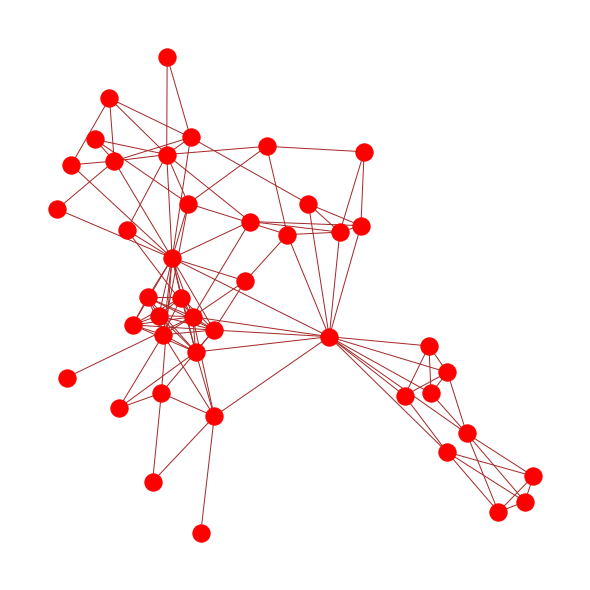

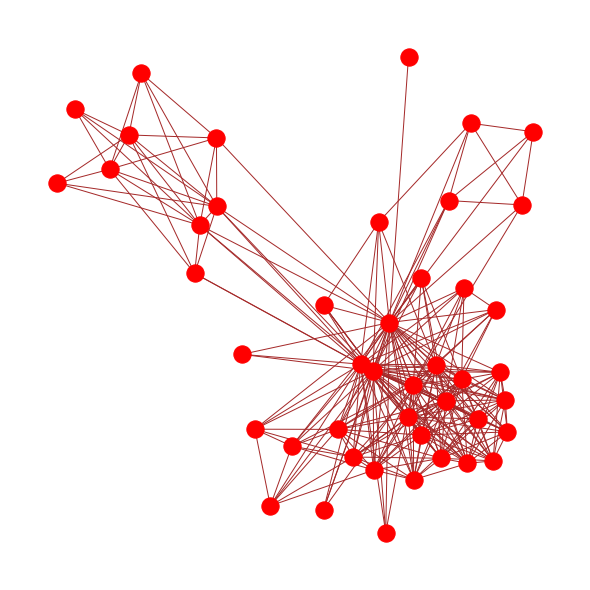

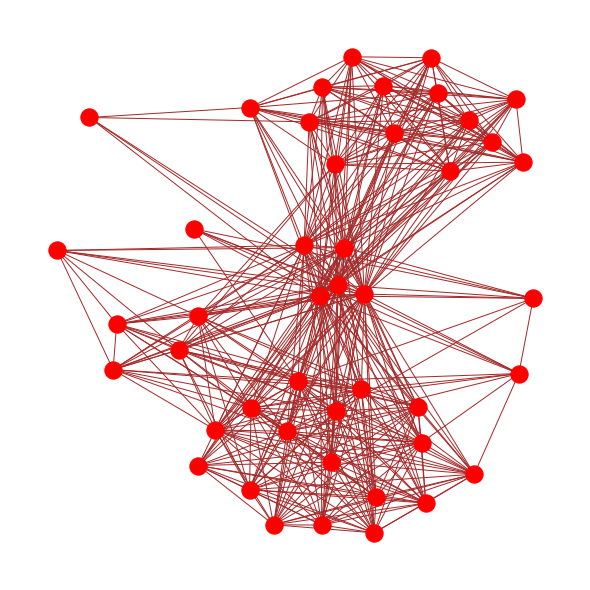

In [30]:
import random as rd
n_plots = 3
choices = rd.choices(list(graficas.keys()),k=3)
for i in choices:
    fig = plt.figure(figsize=(8,8))
    nx.draw(graficas[i],node_color="r",edge_color="brown")
    plt.savefig(f"Red{i}.jpg",transparent=True)
    

In [18]:
rd

NameError: name 'choices' is not defined